In [13]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from os import environ

#local environment variable to store the access token :)
token = environ.get('ibmq_token')

In [15]:
# Loading IBM Q account
account = IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-03-16 16:25:51,826: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
# quasm_sim
simulator = Aer.get_backend('qasm_simulator')

In [10]:
# circuit on q reg with 1 qubit
circuit = QuantumCircuit(2, 2)

# hadamard gate on qbit A
circuit.h(0)

# CNOT on qbit B controlled by A
circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

job = execute(circuit, simulator, shots=1000)

results = job.result()

counts = results.get_counts(circuit)

print(f"total count for 0 and 1 are: {counts}")

total count for 0 and 1 are: {'00': 508, '11': 492}


In [11]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

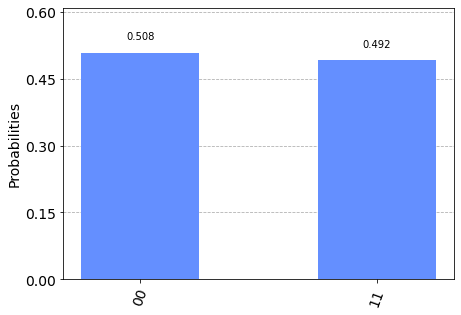

In [14]:
plot_histogram(counts)